In [1]:
import tensorflow as tf

/Users/Kedar/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
type(mnist.train.images)

numpy.ndarray

In [7]:
mist.train.images[2].shape

NameError: name 'mist' is not defined

In [8]:
mnist.train.images[2].shape

(784,)

In [29]:
sample = mnist.train.images[114].reshape(28,28)

In [30]:
import matplotlib.pyplot as plt 

In [31]:
%matplotlib inline

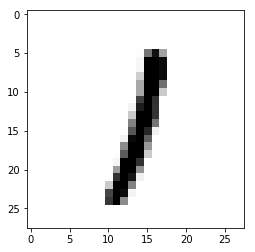

In [32]:
plt.imshow(sample, cmap='Greys')

In [33]:
learning_rate = 0.001
training_epocs = 15 #How many training cycles we go through
batch_size = 100 #Size of batches of training data

In [35]:
#Network paramters
n_classes = 10
n_samples = mnist.train.num_examples

In [43]:
n_input = 784 #size of image (28*28)

In [37]:
n_hidden_1 = 256
n_hidden_2 = 256

In [38]:
#Receive input data array
#Data will begin to have attached weights between the layers
#Add a bias along with that 
#Goes on until final output layer
#More hidden layers, training longer time tradeoff

In [39]:
#Will be using a cost function, to evaluate how far from desired result

In [56]:
def multilayer_perceptron(x,weights,biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: dict of bias values
    '''
    
    #First Hidden Layer w/ RELU Activation Function
    # RELU = (X*W+B) -> f(x) = max(0,x)
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    
    #Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #Last Output Layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    
    return out_layer
    

In [44]:
#Want to initialize weights randomly, at least at first
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [45]:
weights

{'h1': <tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>}

In [46]:
#output should be something like 
# [0 0 0 0 0 0 0 1 0 0] 
# would predict number to be 7, since 1 at 7th index

In [50]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [51]:
biases

{'b1': <tf.Variable 'Variable_6:0' shape=(256,) dtype=float32_ref>,
 'b2': <tf.Variable 'Variable_7:0' shape=(256,) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_8:0' shape=(10,) dtype=float32_ref>}

In [70]:
x = tf.placeholder('float', [None,n_input])
y = tf.placeholder('float', [None,n_classes])

In [71]:
pred = multilayer_perceptron(x, weights, biases)

In [79]:
#Define cost/optimization function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

<tf.Tensor 'Placeholder_4:0' shape=(?, 784) dtype=float32>

In [74]:
y

<tf.Tensor 'Placeholder_5:0' shape=(?, 10) dtype=float32>